In [149]:
#Load Appropriate Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from sklearn.preprocessing import StandardScaler, normalize

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# Load data
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [150]:
# List out the numerical variables that are part of the DataFrame
num_vars=['Murder','Assault','UrbanPop','Rape']

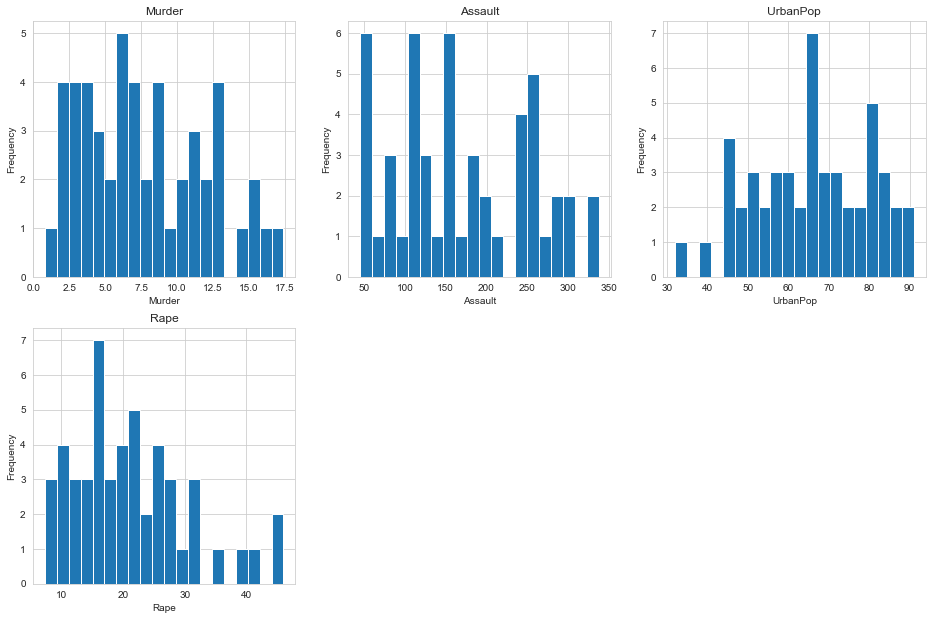

In [151]:
# Visualising the histogram of the distribution of all numeric variables
plt.figure(figsize=(16,16))
for i in range(len(num_vars)):
    plt.subplot(3, 3, i+1)
    var=num_vars[i]
    df[var].plot.hist(edgecolor = 'w',bins = 20)
    plt.title(var)
    plt.xlabel(var)
    #plt.ylabel('Total Numbers')

In [152]:
# get the number of missing data points per column
print('There are zero missing values in the dataset')
missing_values_count = df.isnull().sum()
missing_values_count[0:]


There are zero missing values in the dataset


City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [153]:
df = df.set_index('City')
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [154]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

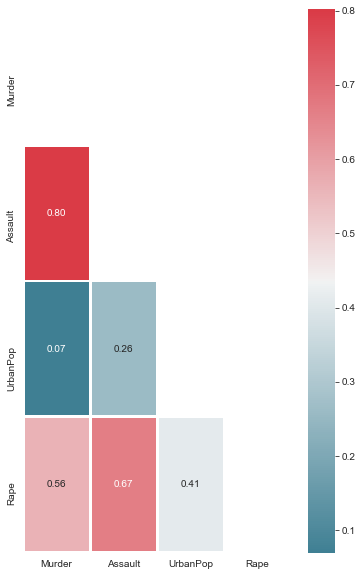

In [155]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(6, 10))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

In [156]:
###CORRELATION ANALYSIS
print('''From the plot above all the variables do show strong positive correlations except ,
UrbanPop variabe shows that it has less impact on the outcomes and has weak relations with the other variables.
This makes the dataset a good candidate for PCA
''')

From the plot above all the variables do show strong positive correlations except ,
UrbanPop variabe shows that it has less impact on the outcomes and has weak relations with the other variables.
This makes the dataset a good candidate for PCA



In [157]:
#df.drop( ['UrbanPop'] ,inplace=True, axis=1)

In [158]:
##Apply PCA
# select and standardize features
X = StandardScaler().fit_transform(df.values)

In [159]:
# choose number of components to be generated
nr_comps = 3
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(X)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index
                      ,columns = ['PC1', 'PC1','PC3'])

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,PC1,PC1,PC3
City,,,
Alabama,0.985566,1.133392,-0.444269
Alaska,1.950138,1.073213,2.040003
Arizona,1.763164,-0.745957,0.054781
Arkansas,-0.141420,1.119797,0.114574
California,2.523980,-1.542934,0.598557


In [160]:
#X = pd.DataFrame(X, columns = df.columns)
#np.mean(X), np.std(X)

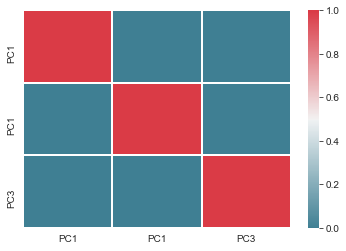

The Uncorrelatedness of the principle elements do show the works of PCA as the infomation has been summarised


In [161]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()
print('The Uncorrelatedness of the principle elements do show the works of PCA as the infomation has been summarised')

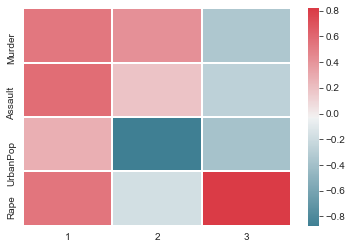

The plot do show that there is positive and negative correlations between the 
original varibale and  the principal components.
Code below shows how the principal components load the original datasets:



In [162]:
# access the correlations between the components and original variables using the components_ method of our PCA() object.
components = pd.DataFrame(pca.components_, columns=df.columns, index=range(1, nr_comps+1)).transpose()
ax = sns.heatmap(components,cmap=colormap,linewidth=1)
plt.show()

print('''The plot do show that there is positive and negative correlations between the 
original varibale and  the principal components.
Code below shows how the principal components load the original datasets:
''')

In [163]:
pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index = df.columns)

,PC1,PC2,PC3
Murder,0.535899,0.418181,-0.341233
Assault,0.583184,0.187986,-0.268148
UrbanPop,0.278191,-0.872806,-0.378016
Rape,0.543432,-0.167319,0.817778


In [164]:
print('''The explained variance tells us how much information (variance) can be attributed to 
each of the principal components.
The Principle components PC1,PC2 &PC3 used 95.67% of the information and 4.33% of the data is lost.
''')
pca.explained_variance_ratio_



The explained variance tells us how much information (variance) can be attributed to 
each of the principal components.
The Principle components PC1,PC2 &PC3 used 95.67% of the information and 4.33% of the data is lost.



array([0.62006039, 0.24744129, 0.0891408 ])

In [165]:
principal_components.shape

(50, 3)

In [166]:
### 2 clustering techniques and an analysis of the clusters they generate.
####K-Means & Hierachical Clustering

In [167]:
##Feature Selection

In [168]:
print('''The main focus of feature selection is to choose features that represent the data set well by 
excluding  redundant and irrelevant data.In this case significant featurer are: Murder/Rape &  Assault .
''')

The main focus of feature selection is to choose features that represent the data set well by 
excluding  redundant and irrelevant data.In this case significant featurer are: Murder/Rape &  Assault .



In [169]:
# prepare data for training, note that we do not supply y in an unsupervised task (which is why it is called unsupervised).
X = df[['Murder','Rape']].values.reshape(-1,2)  

print(X.shape)


(50, 2)


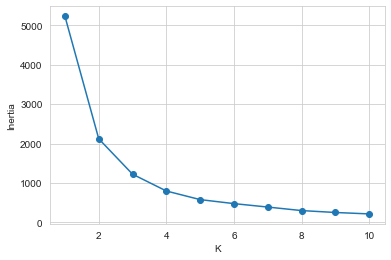

In [170]:
#Use of the Elbow method to determine the value of k
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r)
    kmeans.fit(x)    
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=123):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1,max_k+1)]
    plt.plot(range(1,11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

elbow_Kmeans(X)
#elbow is between 2 & 4, will use the silhouuette score to get the actuall k value

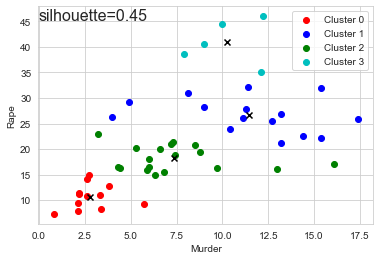

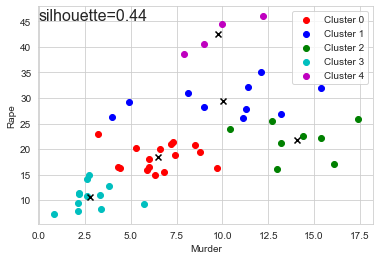

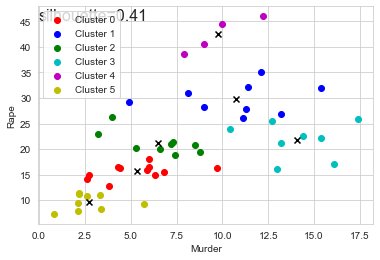

Thus we see that the best silhouette score is actually achieved using k=4


In [171]:
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=r)
    y_pred = kmeans.fit_predict(x)
    colours = 'rbgcmy'
    for c in range(k):
      plt.scatter(x[y_pred == c, 0], x[y_pred == c,1], c = colours[c], label = 'Cluster {}'.format(c))
      plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c = 'black')
    
    score = round(silhouette_score(X, kmeans.labels_, metric='euclidean'),2)
    plt.title('silhouette={}'.format(score), loc='left', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Murder')
    plt.ylabel('Rape')
    plt.legend()
    plt.show()

for k in range(4,7):
  scatter_Kmeans(X, k, r=0)
print('Thus we see that the best silhouette score is actually achieved using k=4')
  

In [172]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1 )
y_pred = kmeans.fit_predict(X)
y_pred

array([1, 2, 1, 3, 2, 2, 0, 3, 1, 1, 3, 0, 1, 3, 0, 3, 3, 1, 0, 1, 3, 2,
       0, 3, 1, 3, 3, 2, 0, 3, 1, 1, 3, 0, 3, 3, 1, 3, 0, 1, 0, 1, 1, 3,
       0, 3, 1, 0, 0, 3])

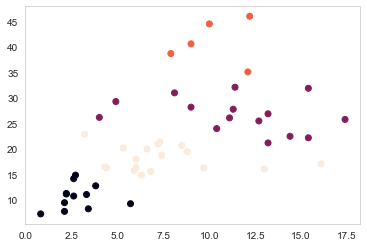

In [120]:
plt.scatter(x = df['Murder'], y = df['Rape'], c = y_pred)
plt.grid()
plt.show()
#Illustration of the k4 value

In [173]:
silhouette_score(X, y_pred)

0.44614577012306694

In [174]:
##Hierachical Clustering





In [175]:
# Select K
K = 4
#continue with feature selections
x = df[['Murder','Rape']].values.reshape(-1,2)  
#scale the data

scaler=StandardScaler()
scaled=scaler.fit_transform(df)

In [176]:
scaled[:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

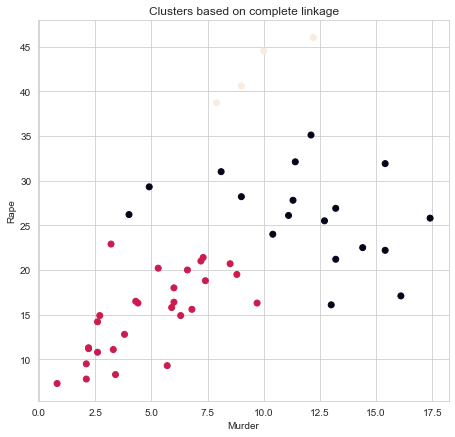

In [181]:
#Complete linkage method and euclidean distance metric
plt.figure(figsize=[25,7])

linkage_types = ['complete']

for i, l in enumerate(linkage_types):
  plt.subplot(1, 3, i+1)
  
  cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=l)
  pred=cluster.fit_predict(x)

  ax = plt.scatter(x[:,0], x[:,1], c=cluster.labels_)
  
  plt.title('Clusters based on {} linkage'.format(l))
  plt.xlabel('Murder')
  plt.ylabel('Rape')

In [182]:
n_clusters=4
silhouette_avg = silhouette_score(x, pred)
print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)
##S(i) will lie between [-1, 1] 
#If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.
#Our sample is not well clusterred [weak]

For no of clusters = 4  The average silhouette_score is : 0.4647595815127671


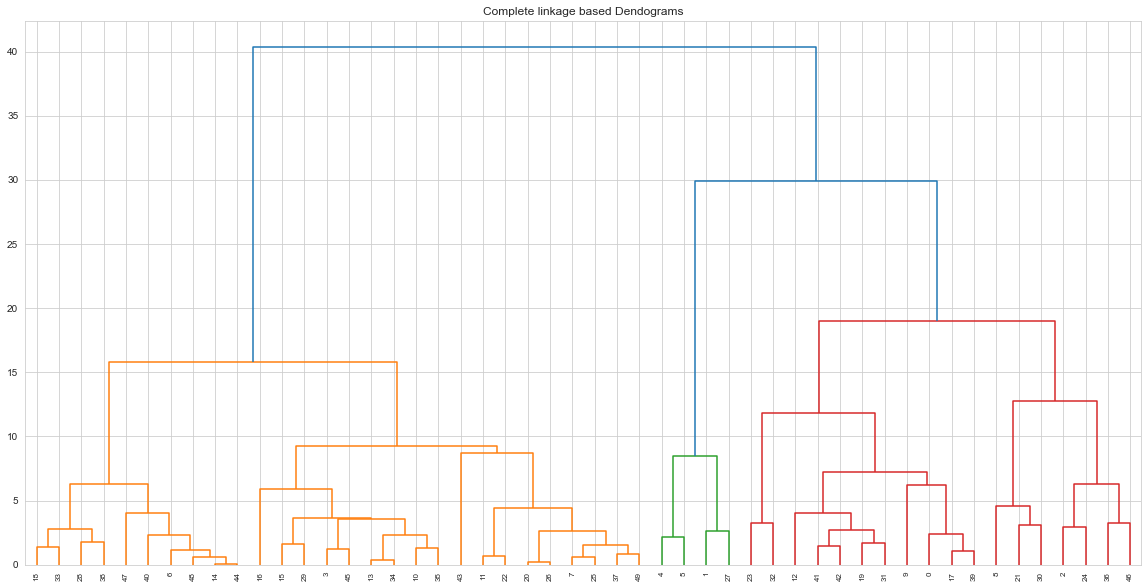

In [183]:
plt.figure(figsize=[20,10])
plt.title("Complete linkage based Dendograms")  
dend = dendrogram(linkage(x, method='complete'))